In [1]:
from netCDF4 import Dataset
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import itertools
import os.path
from os import path
import math
import xarray as xr

<Figure size 432x288 with 0 Axes>

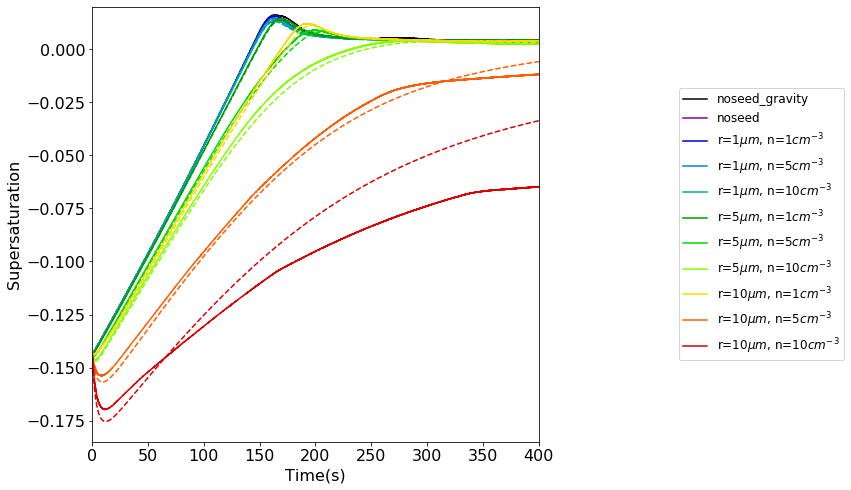

In [38]:
#colormap setup
%matplotlib inline
iparcel=1 #=1 plotout parcel results;=0 no parcel results
#%matplotlib widget
N_ccn=[100]#[100, 1000]
r_seed=[0,1,5,10]
N_seed=['0_gravity',0,1,5,10]
ncolor=12#len(N_seed)*len(r_seed)
#color_new=plt.cm.gist_rainbow(np.linspace(0,1,ncolor))#gist_rainbow
color_new=plt.cm.nipy_spectral(np.linspace(0,1,ncolor))
dir='/glade/u/home/sisichen/IUGG_UAE/DNS_model/condensation_collision/mean_profile/'
#pdir='/glade/u/home/sisichen/IUGG_UAE/DNS_model/condensation_collision/mean_profile/'
pdir='/glade/u/home/sisichen/IUGG_UAE/parcel/monodisperse/ccnN100/'
#dir='/glade/u/home/sisichen/IUGG_UAE/DNS_model/condensation_only/noseed_gravity/'
##supersat one colormap
plt.clf()
fig,ax=plt.subplots(figsize=(8, 8))
ax.set_xlabel('Time(s)')
ax.set_ylabel('Supersaturation')
ax.set_ylim(-0.185,0.02)
ax.set_xlim(0,400)
n=0
for (irseed,inseed) in itertools.product(r_seed,N_seed):
    case='r'+ str(irseed)+'n'+str(inseed)
    meanfile=dir+case+'.nc'
    #parcelfile=pdir+'parcel_'+case+'.out'
    parcelfile=pdir+case+'/IUGG.out'
    if path.exists(meanfile):
        ds_mean=pd.read_csv(meanfile,sep='\s+',index_col=False, header = None, names=\
            ['time','Sp','pp','temp0','thetapp','qvpp','lwc','qvs','rmth','rmqv','s'])
        if path.exists(parcelfile):
            ds_parcel=pd.read_csv(parcelfile,sep='\s+',index_col=False, header = None, names=\
                ['time','H','Sp','lwc','rad1','rad2','pp','temp0','thetapp','qvpp','qvs','rm','rhoa',\
                 'whatever','deltaqp'])
            #ptemp0=ds_parcel.temp0
            #ppp=ds_parcel.pp
            pqv=ds_parcel.qvpp
            pSp=ds_parcel.Sp
            plwc=ds_parcel.lwc
            #pqvs=ds_parcel.qvs
            ptime=ds_parcel.time   
        ds_mean=ds_mean.dropna(thresh=2)
        #temp0=ds_mean.temp0
        #pp=ds_mean.pp
        #qv=ds_mean.qvpp
        Sp=ds_mean.Sp
        Spmax_loc=ds_mean.idxmax().Sp
        Spmin_loc=ds_mean.idxmin().Sp
        lwc=ds_mean.lwc
        qvs=ds_mean.qvs
        time=ds_mean.time
        s=ds_mean.s
        time_spmax=time[Spmax_loc]
        time_spmin=time[Spmin_loc]

        #print(case)
        #print(Sp.max(),Sp.min())
        #print(time_spmax,time_spmin)
        if irseed==0 and str(inseed)=='0_gravity':
            figlabel='noseed_gravity'
        elif irseed == 0 & inseed == 0:
            figlabel='noseed'
        else:
            figlabel='r='+str(irseed)+'$\mu m$, n='+str(inseed)+'$cm^{-3}$'
        ax.plot(time, Sp,label=figlabel,color=color_new[n])
        if iparcel==1 and path.exists(parcelfile):
            ax.plot(ptime,pSp,color=color_new[n],linestyle='--')
        n=n+1
ax.legend(loc='center left',bbox_to_anchor=(1.3, .5))
SMALL_SIZE = 16
OTHER_SIZE = 12
plt.rc('font', size=OTHER_SIZE)
plt.rc('axes', titlesize=SMALL_SIZE)
plt.rc('axes', labelsize=SMALL_SIZE)   
plt.rc('xtick', labelsize=SMALL_SIZE)
plt.rc('ytick', labelsize=SMALL_SIZE)   
plt.rc('legend', fontsize=OTHER_SIZE)
#figname='mean_Ss.png'
#fig.savefig(figname)

In [5]:
parcelfile

'/glade/u/home/sisichen/IUGG_UAE/parcel/monodisperse/ccnN100/r0n0_gravity/IUGG.out'

/glade/u/home/sisichen/IUGG_UAE/DNS_model/condensation_only/mean_profile/fullDNS.nc
/glade/u/home/sisichen/IUGG_UAE/DNS_model/condensation_only/mean_profile/noventi.nc
/glade/u/home/sisichen/IUGG_UAE/DNS_model/condensation_only/mean_profile/nocolli.nc
/glade/u/home/sisichen/IUGG_UAE/DNS_model/condensation_only/mean_profile/noventi_grav_fall_nossfluc.nc


<Figure size 432x288 with 0 Axes>

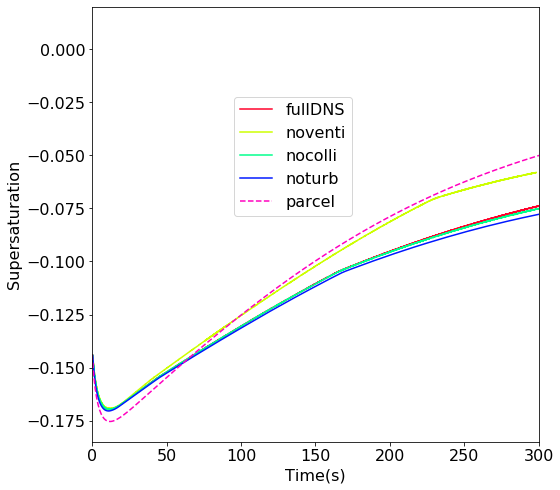

In [11]:
#plot selected cases
#colormap setup
%matplotlib inline
iparcel=1 #=1 plotout parcel results;=0 no parcel results
#%matplotlib widget
cases=['fullDNS','noventi','nocolli','noventi_grav_fall_nossfluc']#noventi_noturb_noinert']#,'noventi_grav_fall_nossfluc',\
      #'noventi_grav_fall_turb']#[100, 1000]
casenames=['fullDNS','noventi','nocolli','noturb']
ncolor=len(cases)+1
color_new=plt.cm.gist_rainbow(np.linspace(0,1,ncolor))#gist_rainbow
#color_new=plt.cm.nipy_spectral(np.linspace(0,1,ncolor))
dir='/glade/u/home/sisichen/IUGG_UAE/DNS_model/condensation_only/mean_profile/'
pdir='/glade/u/home/sisichen/IUGG_UAE/parcel/monodisperse/ccnN100/'
parcelfile=pdir+'r10n10/IUGG.out'
##supersat one colormap
plt.clf()
fig,ax=plt.subplots(figsize=(8, 8))
ax.set_xlabel('Time(s)')
ax.set_ylabel('Supersaturation')
ax.set_ylim(-0.185,0.02)
ax.set_xlim(0,300)
n=0
for (icase,icasenames) in zip(cases,casenames): #itertools.product(cases):
    meanfile=dir+str(icase)+'.nc'
    print(meanfile)
    #parcelfile=pdir+'parcel_'+case+'.out'
    if path.exists(meanfile):
        ds_mean=pd.read_csv(meanfile,sep='\s+',index_col=False, header = None, names=\
            ['time','Sp','pp','temp0','thetapp','qvpp','lwc','qvs','rmth','rmqv','s']) 
        ds_mean=ds_mean.dropna(thresh=2)
        #temp0=ds_mean.temp0
        #pp=ds_mean.pp
        #qv=ds_mean.qvpp
        Sp=ds_mean.Sp
        Spmax_loc=ds_mean.idxmax().Sp
        Spmin_loc=ds_mean.idxmin().Sp
        lwc=ds_mean.lwc
        qvs=ds_mean.qvs
        time=ds_mean.time
        s=ds_mean.s
        time_spmax=time[Spmax_loc]
        time_spmin=time[Spmin_loc]
        figlabel=str(icasenames)
        ax.plot(time, Sp,label=figlabel,color=color_new[n])
        n=n+1
        
if path.exists(parcelfile) and iparcel==1:
    ds_parcel=pd.read_csv(parcelfile,sep='\s+',index_col=False, header = None, names=\
        ['time','H','Sp','lwc','rad1','rad2','pp','temp0','thetapp','qvpp','qvs','rm','rhoa',\
        'whatever','deltaqp'])
    
    #ptemp0=ds_parcel.temp0
    #ppp=ds_parcel.pp
    pqv=ds_parcel.qvpp
    pSp=ds_parcel.Sp
    plwc=ds_parcel.lwc
    #pqvs=ds_parcel.qvs
    ptime=ds_parcel.time  
    ax.plot(ptime,pSp,color=color_new[n],label='parcel',linestyle='--')
SMALL_SIZE = 16
plt.rc('font', size=SMALL_SIZE)
plt.rc('axes', titlesize=SMALL_SIZE)
plt.rc('axes', labelsize=SMALL_SIZE)   
plt.rc('xtick', labelsize=SMALL_SIZE)
plt.rc('ytick', labelsize=SMALL_SIZE)   
plt.rc('legend', fontsize=SMALL_SIZE)
plt.rc('figure', titlesize=SMALL_SIZE)
ax.legend(bbox_to_anchor=(.6, .5))
#figname='mean_Ss.png'
#fig.savefig(figname)

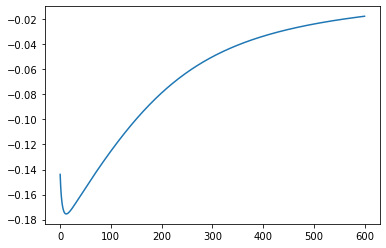

In [25]:
plt.plot(ptime,pSp)

In [1]:
dir='/glade/u/home/sisichen/IUGG_UAE/DNS_model/condensation_collision/noseed/'
file='out.ncf'

filedir=dir+file
fh = Dataset(filedir,mode='r')
QV=fh.variables['QV'][0][:][:][:]
TH=fh.variables['TH'][0][:][:][:]
#dimension is in (y,z,x) order
#plt.contourf(TH[1,:,:])
#print(TH.mean(),C_physical.mean())
#QV.shape


NameError: name 'Dataset' is not defined

In [2]:
dir='/glade/u/home/sisichen/IUGG_UAE/DNS_model/condensation_collision/noseed/'
file='Zk4.ncf'
filedir=dir+file
fh = Dataset(filedir,mode='r')
QVK=fh.variables['QVK'][:]
THK=fh.variables['TTK'][:]
#ZXK=fh.variables['ZXK'][:]
#dimension is in (z,y,x) order
fh.close()
#ZXK1=ZXK[0][:][:][:][:]

QV1=QVK[0][:][:][:][:]
TH1=THK[0][:][:][:][:]
C_QV = np.zeros((128,128,65),dtype=complex)
C_TH = np.zeros((128,128,65),dtype=complex)
#C_ZXK = np.zeros((128,128,65),dtype=complex)
C_QV.real[:][:][:]=QV1[0][:][:][:]
C_QV.imag[:][:][:]=QV1[1][:][:][:]
C_TH.real[:][:][:]=TH1[0][:][:][:]
C_TH.imag[:][:][:]=TH1[1][:][:][:]
n=128

C_3d=np.zeros((128,128,128),dtype=complex)
C_3d[:,:,0:int(n/2)+1]=C_TH

nrange=range(0,int(n/2)-1)
for kx in nrange:
    ikx=int(n/2)-1-kx
    inkx=int(n/2)+1+kx
    print(inkx,ikx,kx)
    C_3d[:,:,inkx]=np.conj(C_TH[:,:,ikx])
    
#impose realistic boundary condition
# First, negative ky axis; no communication required
# Set zk(0,-ky,0) = conjg(zk(0,ky,0)) 
for ky in nrange:
    iky=int(n/2)-1-ky
    inky=int(n/2)+1+ky
    #print(ky,inky)
    C_3d[0,inky,0]=np.conj(C_TH[0,iky,0])
    
# Then Negative kz axis. Set Set zk(0,0,-kz) = conjg(zk(0,0,kz))  
for kz in nrange:
    ikz=int(n/2)-1-kz
    inkz=int(n/2)+1+kz
    C_3d[inkz,0,0]=np.conj(C_TH[ikz,0,0])
    
#Do rest of kx=0 plane
for (ky,kz) in itertools.product(nrange,nrange):
    ikz=int(n/2)-1-kz
    inkz=int(n/2)+1+kz
    iky=int(n/2)-1-ky
    inky=int(n/2)+1+ky
    C_3d[inkz,inky,0]=np.conj(C_TH[ikz,iky,0])
    C_3d[ikz,inky,0]=np.conj(C_TH[inkz,iky,0])

#do forward fourier transform 
# first shift the matrix to the symmetric
C_3d=np.fft.fftshift(C_3d, axes=(0,1,2))
C_abs=abs(C_3d)
C_fftkr=np.fft.fftn((C_3d))
C_physical=np.sqrt(C_fftkr.real**2+C_fftkr.imag**2)
#plt.grid
plt.contourf(C_physical[1,:,:])
#C_ZXK.real[:][:][:]=ZXK1[0][:][:][:]
#C_ZXK.imag[:][:][:]=ZXK1[1][:][:][:]
#C_QV_conj=-
C_physical.shape

NameError: name 'Dataset' is not defined

In [65]:
C_3d[110,40,100]

(1.1351622974942188e-09+5.320643037265427e-09j)

In [73]:
abs(C_3d[:,:,0]).sum

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

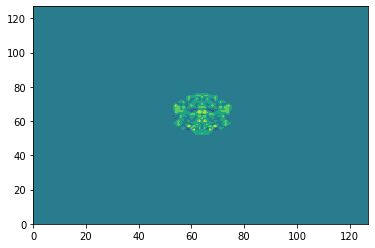

In [76]:
C_3D=C_TH_3d[:,:,:]
C_3D=np.fft.fftshift(C_3D, axes=(0,1,2))
C_abs=abs(C_3D)
plt.grid
plt.contourf(C_3D[1,:,:])

In [43]:
dir='/glade/u/home/sisichen/IUGG_UAE/DNS_model/condensation_collision/CC_runs/noseed/'
file='Zk1.ncf'
filedir=dir+file
ds = xr.open_dataset(filedir)
ttk=ds.TTK
qvk=ds.QVK
ttk_real=np.fft.ifftn(ttk)

<Figure size 432x288 with 0 Axes>

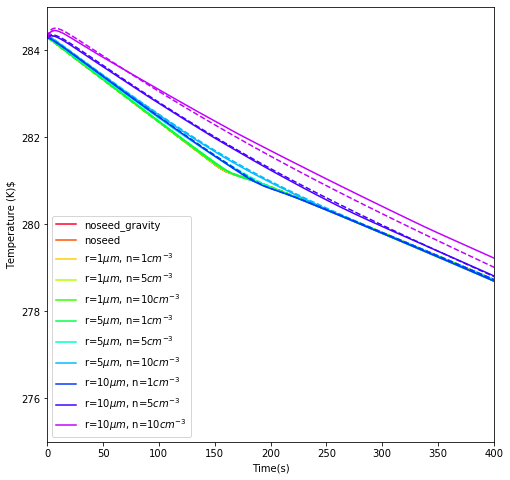

In [50]:
#temperature#colormap setup
%matplotlib inline
iparcel=1 #=1 plotout parcel results;=0 no parcel results
#%matplotlib widget
N_ccn=[100]#[100, 1000]
r_seed=[0,1,5,10]
N_seed=['0_gravity',0,1,5,10]
ncolor=12#len(N_seed)*len(r_seed)
color_new=plt.cm.gist_rainbow(np.linspace(0,1,ncolor))

dir='/glade/u/home/sisichen/IUGG_UAE/DNS_model/condensation_collision/mean_profile/'
pdir='/glade/u/home/sisichen/IUGG_UAE/DNS_model/condensation_collision/mean_profile/'
#dir='/glade/u/home/sisichen/IUGG_UAE/DNS_model/condensation_only/noseed_gravity/'
plt.clf()
fig,ax=plt.subplots(figsize=(8, 8))
ax.set_xlabel('Time(s)')
ax.set_ylabel('Temperature (K)$')
ax.set_ylim(275,285)
ax.set_xlim(0,400)
n=0
for (irseed,inseed) in itertools.product(r_seed,N_seed):
    case='r'+ str(irseed)+'n'+str(inseed)
    meanfile=dir+case+'.nc'
    parcelfile=pdir+'parcel_'+case+'.out'
    if path.exists(meanfile):
        ds_mean=pd.read_csv(meanfile,sep='\s+',index_col=False, header = None, names=\
            ['time','Sp','pp','temp0','thetapp','qvpp','lwc','qvs','rmth','rmqv','s'])
        if path.exists(parcelfile):
            ds_parcel=pd.read_csv(parcelfile,sep='\s+',index_col=False, header = None, names=\
                ['time','H','Sp','lwc','rad1','rad2','pp','temp0','thetapp','qvpp','qvs','rm','rhoa',\
                 'whatever','deltaqp'])
        ds_mean=ds_mean.dropna(thresh=2)#no NA numbers
        time=ds_mean.time
        theta=ds_mean.thetapp
        temp0=ds_mean.temp0
        
        ptime=ds_parcel.time 
        ptheta=ds_parcel.thetapp
        ptemp0=ds_parcel.temp0
        
        if irseed==0 and str(inseed)=='0_gravity':
            figlabel='noseed_gravity'
        elif irseed == 0 & inseed == 0:
            figlabel='noseed'
        else:
            figlabel='r='+str(irseed)+'$\mu m$, n='+str(inseed)+'$cm^{-3}$'
        ax.plot(time, temp0,label=figlabel,color=color_new[n])
        if iparcel==1:
            ax.plot(ptime,ptemp0,color=color_new[n],linestyle='--')
        n=n+1
ax.legend()#bbox_to_anchor=(1, .5))
figname='mean_temp.png'
fig.savefig(figname)

In [24]:
n

11

<Figure size 432x288 with 0 Axes>

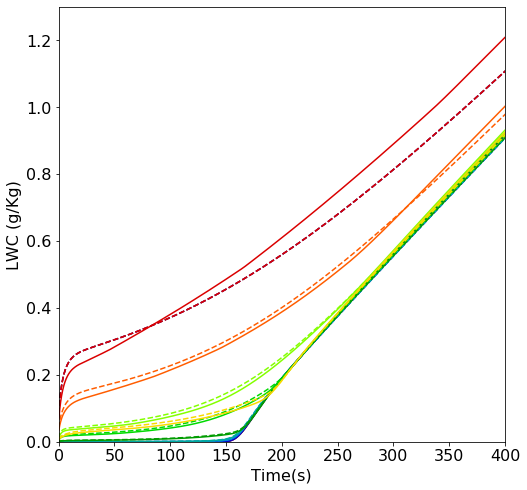

In [41]:
#lwc
%matplotlib inline
iparcel=1 #=1 plotout parcel results;=0 no parcel results
#%matplotlib widget
N_ccn=[100]#[100, 1000]
r_seed=[0,1,5,10]
N_seed=['0_gravity',0,1,5,10]
ncolor=12#len(N_seed)*len(r_seed)
color_new=plt.cm.nipy_spectral(np.linspace(0,1,ncolor))

dir='/glade/u/home/sisichen/IUGG_UAE/DNS_model/condensation_collision/mean_profile/'
#pdir='/glade/u/home/sisichen/IUGG_UAE/DNS_model/condensation_collision/mean_profile/'
pdir='/glade/u/home/sisichen/IUGG_UAE/parcel/monodisperse/ccnN100/'
#dir='/glade/u/home/sisichen/IUGG_UAE/DNS_model/condensation_only/noseed_gravity/'
plt.clf()
fig,ax=plt.subplots(figsize=(8, 8))
ax.set_xlabel('Time(s)')
ax.set_ylabel('LWC (g/Kg)')
ax.set_ylim(0,1.3)
ax.set_xlim(0,400)
n=0
for (irseed,inseed) in itertools.product(r_seed,N_seed):
    case='r'+ str(irseed)+'n'+str(inseed)
    meanfile=dir+case+'.nc'
    #parcelfile=pdir+'parcel_'+case+'.out'
    parcelfile=pdir+case+'/IUGG.out'
    if path.exists(meanfile):
        ds_mean=pd.read_csv(meanfile,sep='\s+',index_col=False, header = None, names=\
            ['time','Sp','pp','temp0','thetapp','qvpp','lwc','qvs','rmth','rmqv','s'])
        if path.exists(parcelfile):
            ds_parcel=pd.read_csv(parcelfile,sep='\s+',index_col=False, header = None, names=\
                ['time','H','Sp','lwc','rad1','rad2','pp','temp0','thetapp','qvpp','qvs','rm','rhoa',\
                 'whatever','deltaqp'])
        ds_mean=ds_mean.dropna(thresh=2)
        time=ds_mean.time
        lwc=ds_mean.lwc
        qv=ds_mean.qvpp
        
        ptime=ds_parcel.time 
        plwc=ds_parcel.lwc
        
        if irseed==0 and str(inseed)=='0_gravity':
            figlabel='noseed_gravity'
        elif irseed == 0 & inseed == 0:
            figlabel='noseed'
        else:
            figlabel='r='+str(irseed)+'$\mu m$, n='+str(inseed)+'$cm^{-3}$'
        ax.plot(time, (lwc[0]+qv[0]-qv)*1e3,label=figlabel,color=color_new[n])
        if iparcel==1:
            ax.plot(ptime,plwc*1e3,color=color_new[n],linestyle='--')
        n=n+1
#ax.legend(loc='center left',bbox_to_anchor=(1.3, .5))
SMALL_SIZE = 16
OTHER_SIZE = 12
plt.rc('font', size=OTHER_SIZE)
plt.rc('axes', titlesize=SMALL_SIZE)
plt.rc('axes', labelsize=SMALL_SIZE)   
plt.rc('xtick', labelsize=SMALL_SIZE)
plt.rc('ytick', labelsize=SMALL_SIZE)   
plt.rc('legend', fontsize=OTHER_SIZE)
figname='mean_lwc.png'
#fig.savefig(figname)

parcel


<Figure size 432x288 with 0 Axes>

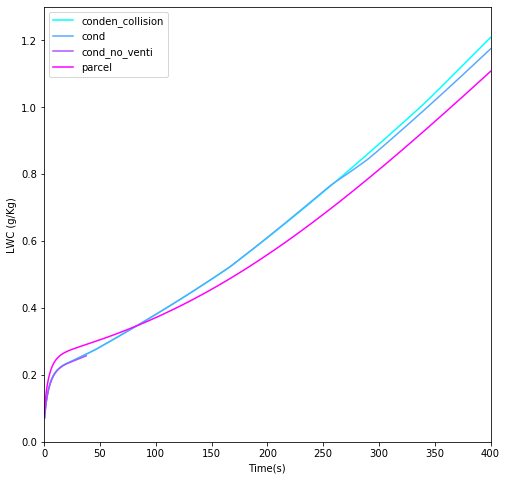

In [19]:
#lwc comparison between r10n10 runs
%matplotlib inline
iparcel=1 #=1 plotout parcel results;=0 no parcel results
#%matplotlib widget
irseed,inseed=10,10

dir='/glade/u/home/sisichen/IUGG_UAE/DNS_model/condensation_collision/mean_profile/'

case_contrl='r'+ str(irseed)+'n'+str(inseed)
case_cond='r'+ str(irseed)+'n'+str(inseed)+'_cond'
case_novent='r'+ str(irseed)+'n'+str(inseed)+'_cond_novent'
case_parcel='parcel_'+ case_contrl
cases=[case_contrl, case_cond, case_novent,case_parcel]
n_case=len(cases)
ncolor=n_case
color_new=plt.cm.cool(np.linspace(0,1,ncolor))
plt.clf()
fig,ax=plt.subplots(figsize=(8, 8))
ax.set_xlabel('Time(s)')
ax.set_ylabel('LWC (g/Kg)')
ax.set_ylim(0,1.3)
ax.set_xlim(0,400)
n=0
for i_case in range(n_case):
    case=cases[i_case]
    if i_case == n_case-1:
        meanfile=dir+case+'.out'
        if path.exists(meanfile):
            ds_mean=pd.read_csv(meanfile,sep='\s+',index_col=False, header = None, names=\
                ['time','H','Sp','lwc','rad1','rad2','pp','temp0','thetapp','qvpp','qvs','rm','rhoa',\
                 'whatever','deltaqp'])
    else:
        meanfile=dir+case+'.nc'
        if path.exists(meanfile):
            ds_mean=pd.read_csv(meanfile,sep='\s+',index_col=False, header = None, names=\
                ['time','Sp','pp','temp0','thetapp','qvpp','lwc','qvs','rmth','rmqv','s'])
    if path.exists(meanfile):
        ds_mean=ds_mean.dropna(thresh=2)
        time=ds_mean.time
        lwc=ds_mean.lwc
        qv=ds_mean.qvpp
        
        if case==case_contrl:
            figlabel='conden_collision'
        elif case==case_cond:
            figlabel='cond'
        elif case==case_novent:
            figlabel='cond_no_venti'
        elif case==case_parcel:
            figlabel='parcel'
            print(figlabel)
        #if i_case == n_case-1:
        #    ax.plot(time,lwc*1e3,label=figlabel,color=color_new[i_case],linestyle='--')
        #else:
        ax.plot(time, (lwc[0]+qv[0]-qv)*1e3,label=figlabel,color=color_new[i_case])

ax.legend()#bbox_to_anchor=(1.01, 0.5))
figname='mean_lwc.png'
fig.savefig(figname)

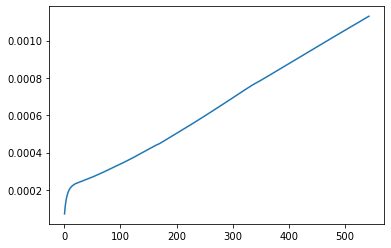

In [75]:
plt.plot(time,(lwc[0]+qv[0]-qv+lwc)/2)

<Figure size 432x288 with 0 Axes>

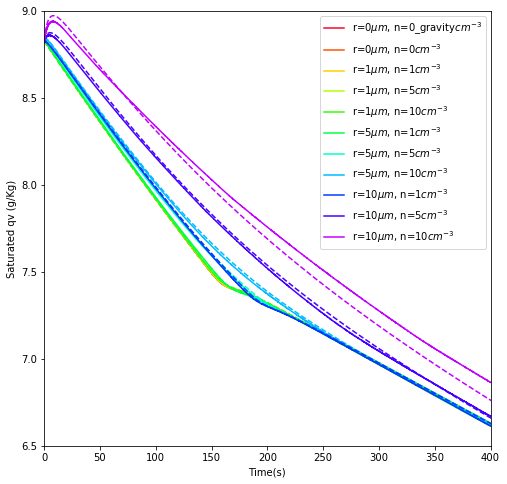

In [54]:
#qv
%matplotlib inline
iparcel=1 #=1 plotout parcel results;=0 no parcel results
#%matplotlib widget
N_ccn=[100]#[100, 1000]
r_seed=[0,1,5,10]
N_seed=['0_gravity',0,1,5,10]
ncolor=12#len(N_seed)*len(r_seed)
color_new=plt.cm.gist_rainbow(np.linspace(0,1,ncolor))

dir='/glade/u/home/sisichen/IUGG_UAE/DNS_model/condensation_collision/mean_profile/'
pdir='/glade/u/home/sisichen/IUGG_UAE/DNS_model/condensation_collision/mean_profile/'
#dir='/glade/u/home/sisichen/IUGG_UAE/DNS_model/condensation_only/noseed_gravity/'
plt.clf()
fig,ax=plt.subplots(figsize=(8, 8))
ax.set_xlabel('Time(s)')
ax.set_ylabel('Saturated qv (g/Kg)')
ax.set_ylim(6.5,9)
ax.set_xlim(0,400)
n=0
for (irseed,inseed) in itertools.product(r_seed,N_seed):
    case='r'+ str(irseed)+'n'+str(inseed)
    meanfile=dir+case+'.nc'
    parcelfile=pdir+'parcel_'+case+'.out'
    if path.exists(meanfile):
        ds_mean=pd.read_csv(meanfile,sep='\s+',index_col=False, header = None, names=\
            ['time','Sp','pp','temp0','thetapp','qvpp','lwc','qvs','rmth','rmqv','s'])
        if path.exists(parcelfile):
            ds_parcel=pd.read_csv(parcelfile,sep='\s+',index_col=False, header = None, names=\
                ['time','H','Sp','lwc','rad1','rad2','pp','temp0','thetapp','qvpp','qvs','rm','rhoa',\
                 'whatever','deltaqp'])
        ds_mean=ds_mean.dropna(thresh=2)
        time=ds_mean.time
        qv=ds_mean.qvpp
        qvs=ds_mean.qvs
        
        ptime=ds_parcel.time 
        pqv=ds_parcel.qvpp
        pqvs=ds_parcel.qvs
        
        figlabel='r='+str(irseed)+'$\mu m$, n='+str(inseed)+'$cm^{-3}$'
        pfiglabel='parcel r='+str(irseed)+'$\mu m$, n='+str(inseed)+'$cm^{-3}$'
        ax.plot(time, qvs*1e3,label=figlabel,color=color_new[n])
        if iparcel==1:
            ax.plot(ptime,pqvs*1e3,color=color_new[n],linestyle='--')
        n=n+1
ax.legend()#bbox_to_anchor=(.7, 0.5))
figname='mean_qvs.png'
fig.savefig(figname)